In [20]:
##import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.stats import pearsonr

## Read dataset 
data_read=pd.read_csv(r"cancer dataset.csv")
import warnings
warnings.filterwarnings("ignore")
data_read
data_read.head()
##data_read.iloc[:, :2].values

data_read.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Step 1: Open the file in your python notebook, print first 5 rows of the dataset and mention what are the dependent and independent variables in the Data.

In [14]:
data_read.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### In this dataset independent variables are radius, texture, perimeter,area, smoothness, compactness, concavity,concave points, symmetry, fractal dimension.
#### Each variables have three factors mean, standard error and worst. Here Dependent variable is diagnosis which provides Benign or Malignant.

## Step 2: Find the statistical parameters of the Data that you have

In this dataset, all columns are statistical parameters except diagnosis. If we need to convert this diagnosis to statistical, then using labelEncoder we can convert to numerical data.

## Step 3: Find the shape of the Dataset in hand

In [4]:
shape = data_read.shape
size = data_read.size
print("Shape of Data : {} ".format(shape))
print("Size of Data: {}".format(size))

Shape of Data : (569, 32) 
Size of Data: 18208


## Step 4: Find missing values from the Dataset

In [13]:
#print("If data null, it will print true: {} ".format(data_read.isnull()))
print("Number of null values for each column : \n")
print("Column Name.  --------    Count.\n{}".format(data_read.isnull().sum()))
# Here no missing values in given dataset

Number of null values for each column : 

Column Name.  --------    Count.
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst   

## Step 5: Find the value count of B(Benign) and M(Malignant) cancer cells in the column "diagnosis"

In [71]:
print("Printing Number of Benign and Malignant Count\n")
data_read['diagnosis'].value_counts()

Printing Number of Benign and Malignant Count



B    357
M    212
Name: diagnosis, dtype: int64

## Step 6: Creating a pairplot and mention the findings

           id  diagnosis  radius_mean  texture_mean  perimeter_mean
0      842302          1        17.99         10.38          122.80
1      842517          1        20.57         17.77          132.90
2    84300903          1        19.69         21.25          130.00
3    84348301          1        11.42         20.38           77.58
4    84358402          1        20.29         14.34          135.10
..        ...        ...          ...           ...             ...
564    926424          1        21.56         22.39          142.00
565    926682          1        20.13         28.25          131.20
566    926954          1        16.60         28.08          108.30
567    927241          1        20.60         29.33          140.10
568     92751          0         7.76         24.54           47.92

[569 rows x 5 columns]


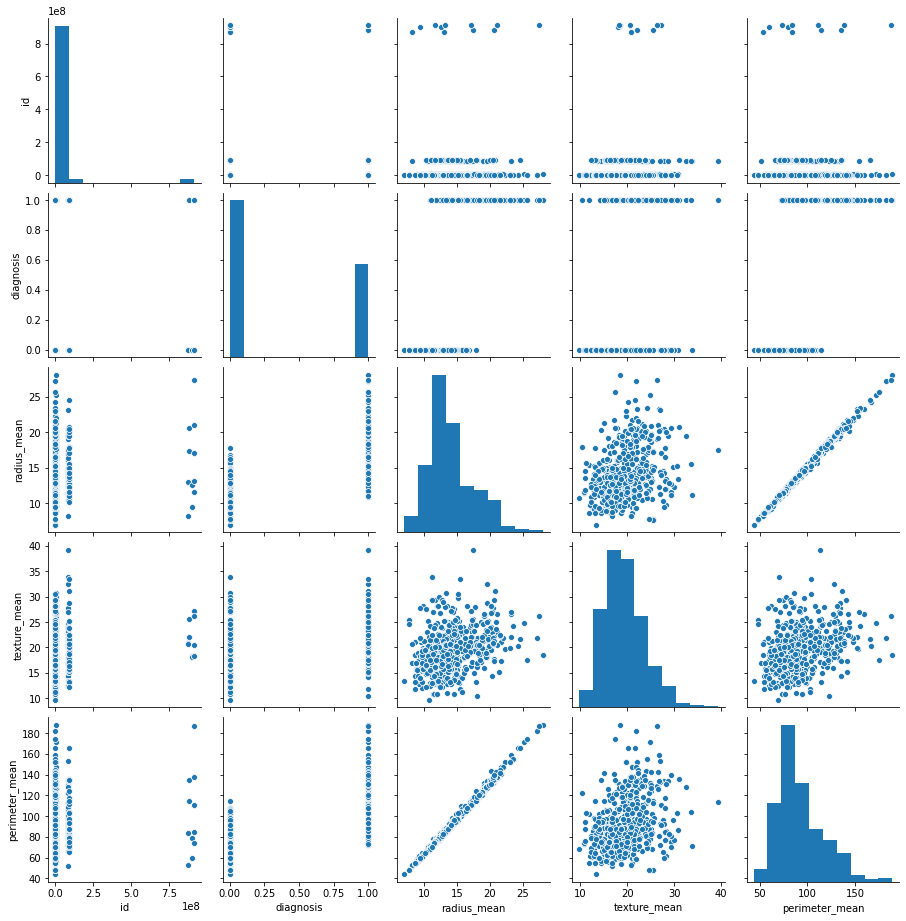

In [12]:
#sns.pairplot(data_read, hue="diagnosis")
data_filtered = data_read.iloc[:, 0:5]
print(data_filtered)

sns.pairplot(data_filtered)

## Step 7: Create a correlation matrix and mention strongly, weakly and negatively correlated quantities

In [70]:
data_read.corr(method="pearson")
#data_filtered.corr()

pearsonr_coefficient, radius_id_value = pearsonr(data_read["radius_mean"],data_read["id"])
print ('Pearson Correlation coefficient %0.3f' % radius_id_value)
pearsonr_coefficient, radius_peri_value = pearsonr(data_read["radius_mean"],data_read["perimeter_mean"])
print ('Pearson Correlation coefficient %0.3f' % radius_peri_value)
pearsonr_coefficient, radius_tex_value = pearsonr(data_read["radius_mean"],data_read["texture_mean"])
print ('Pearson Correlation coefficient %0.3f' % radius_tex_value)
pearsonr_coefficient, radius_area_value = pearsonr(data_read["radius_mean"],data_read["area_mean"])
print ('Pearson Correlation coefficient %0.3f' % radius_area_value)
pearsonr_coefficient, radius_smooth_value = pearsonr(data_read["compactness_worst"],data_read["smoothness_mean"])
print ('Pearson Correlation coefficient %0.3f' % radius_smooth_value)

Pearson Correlation coefficient 0.075
Pearson Correlation coefficient 0.000
Pearson Correlation coefficient 0.000
Pearson Correlation coefficient 0.000
Pearson Correlation coefficient 0.000


In [ ]:
Coefficient value near to 0 -> Weakly correlated quantities
Coefficient value positive and near to one -> Strongly correlated quantities
Coefficinet value negative -> Negatively correlated quantities

## (Optional) Step 8: Create a heatmap of the correlated features (helps in visualization)

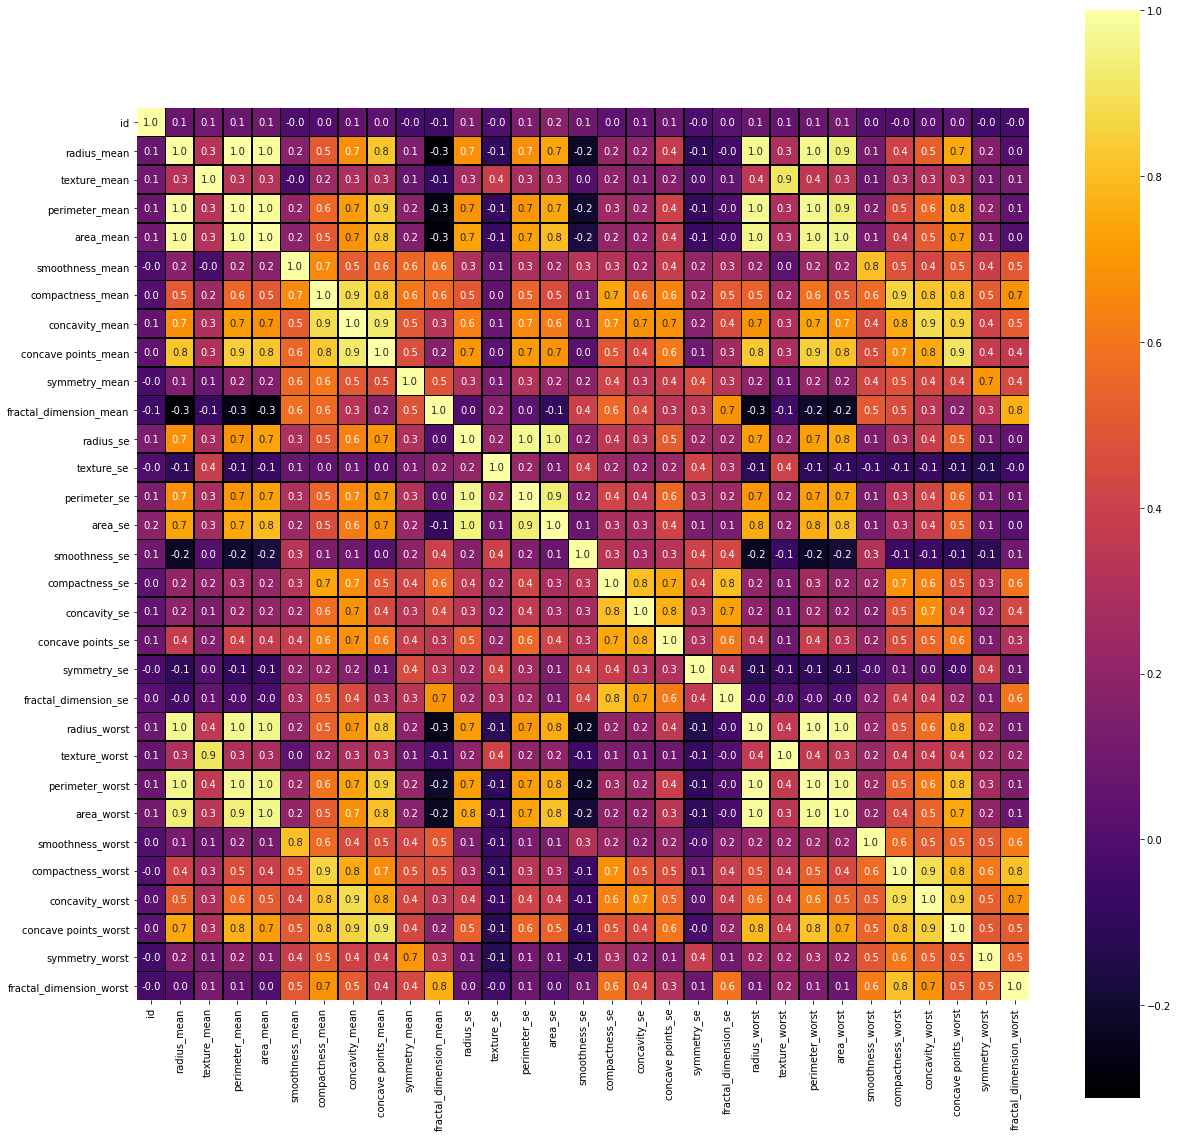

In [78]:
plt.figure(figsize = (20,20))
sns.heatmap(data_read.corr(),annot=True, fmt=".1f", cmap='inferno', linewidths = .5, square= True, linecolor ="k")